<a href="https://colab.research.google.com/github/tm-nithya/Task-1/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = pd.read_csv('/content/drive/MyDrive/codesoft/advertising.csv')


# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Features (independent variables)
X = df[['TV', 'Radio', 'Newspaper']]

# Target (dependent variable)
y = df['Sales']


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predicting sales for the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.4374328500000009
R^2 Score: 0.9534827934927883


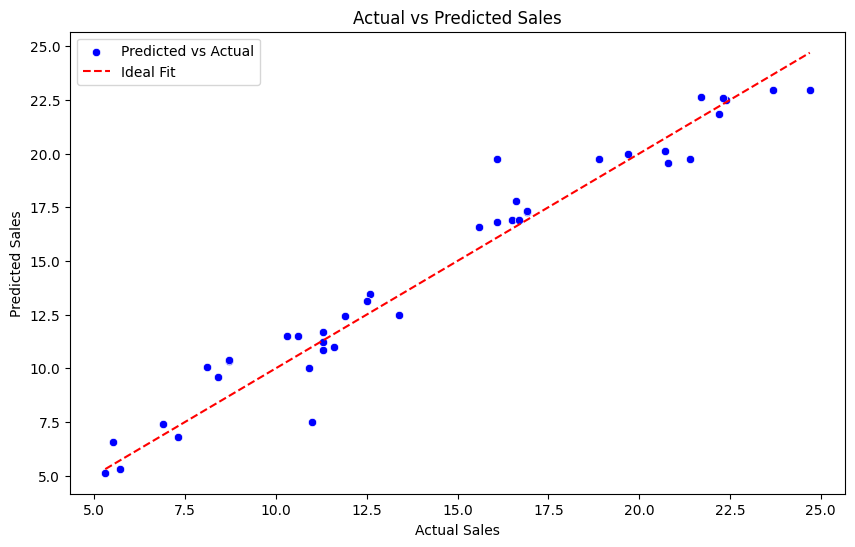

In [ ]:

# Plotting Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


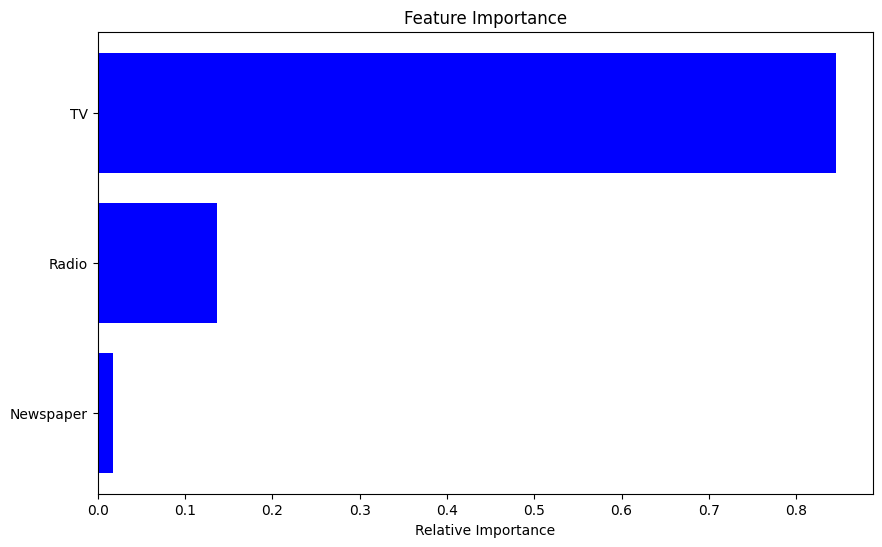

In [ ]:
import numpy as np
# Plotting Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:

# Predicting new sales data
new_data = pd.DataFrame({
    'TV': [150.0, 200.0],
    'Radio': [35.0, 25.0],
    'Newspaper': [50.0, 40.0]
})

predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales)


Predicted Sales: [16.19 17.37]
